In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lightgbm as lgb
import joblib

In [27]:

model = joblib.load('models/final_pipeline.joblib')
# Suponiendo que ya tienes un modelo LGBMRegressor entrenado llamado 'model'
# y un DataFrame 'X' con las características usadas para entrenar el modelo
X = pd.read_csv('data/processed/X_test.csv', index_col=0)

In [28]:
model.named_steps['best_model'].feature_importances_


array([ 541,  737, 1249, 1193,  536,   37], dtype=int32)

In [33]:
lgbm = model.named_steps['best_model']

In [34]:
lgbm.feature_name_

['antique',
 'vehicle_make',
 'vehicle_line',
 'kilometraje',
 'location_city',
 'location_state']

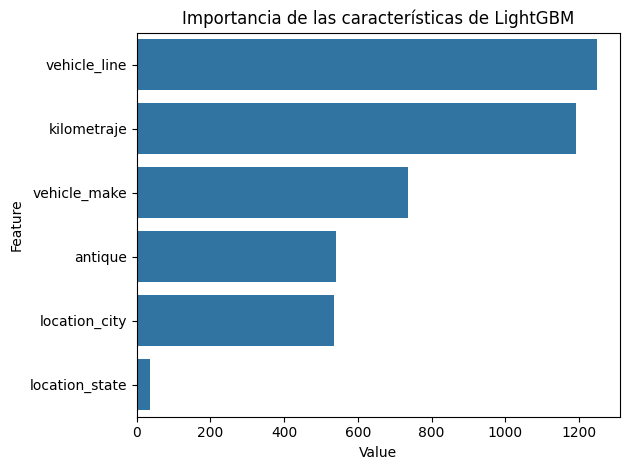

In [36]:
def plot_feature_importance(pipeline, X, num=20):
    # Acceder al modelo LGBMRegressor dentro del pipeline
    lgbm_model = pipeline.named_steps['best_model']
    
    # Obtener la importancia de las características
    feature_imp = pd.DataFrame({'Value': lgbm_model.feature_importances_, 'Feature': lgbm.feature_name_})
    
    # Ordenar las características por importancia
    feature_imp = feature_imp.sort_values(by='Value', ascending=False)
    
    # Crear el gráfico
    sns.barplot(x='Value', y='Feature', data=feature_imp.head(num))
    plt.title('Importancia de las características de LightGBM')
    plt.tight_layout()
    plt.show()

# Llamar a la función con tu pipeline y DataFrame
plot_feature_importance(model, X)

